# 基础组件之Pipeline

##  查看Pipeline支持的任务类型

In [1]:
from transformers.pipelines import SUPPORTED_TASKS

/home/pika/App/miniconda3/envs/transformers/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pprint import pprint

pprint(SUPPORTED_TASKS.keys())

dict_keys(['audio-classification', 'automatic-speech-recognition', 'text-to-audio', 'feature-extraction', 'text-classification', 'token-classification', 'question-answering', 'table-question-answering', 'visual-question-answering', 'document-question-answering', 'fill-mask', 'summarization', 'translation', 'text2text-generation', 'text-generation', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-audio-classification', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-to-text', 'object-detection', 'zero-shot-object-detection', 'depth-estimation', 'video-classification', 'mask-generation', 'image-to-image'])


In [3]:
for k, v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

In [4]:
SUPPORTED_TASKS["image-to-image"]

{'impl': transformers.pipelines.image_to_image.ImageToImagePipeline,
 'tf': (),
 'pt': (transformers.models.auto.modeling_auto.AutoModelForImageToImage,),
 'default': {'model': {'pt': ('caidas/swin2SR-classical-sr-x2-64',
    '4aaedcb')}},
 'type': 'image'}

## Pipeline的创建与使用方式

In [5]:
from transformers import pipeline, QuestionAnsweringPipeline

### 根据任务类型直接创建Pipeline，默认都是英文的模型

In [6]:
pipe = pipeline(task="text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://hf-mirror.com/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [7]:
pipe(["very good!", "vary bad!"])

[{'label': 'POSITIVE', 'score': 0.9998525381088257},
 {'label': 'NEGATIVE', 'score': 0.9991207718849182}]

### 指定任务类型，再指定模型，创建基于指定模型的Pipeline

In [8]:
# https://huggingface.co/models
pipe = pipeline(
    task="text-classification", model="uer/roberta-base-finetuned-dianping-chinese"
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [9]:
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

### 预先加载模型，再创建Pipeline

In [10]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 这种方式，必须同时指定model和tokenizer
model = AutoModelForSequenceClassification.from_pretrained(
    "uer/roberta-base-finetuned-dianping-chinese"
)
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [11]:
pipe("我觉得不太行！")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9735506772994995}]

In [12]:
pipe.model.device

device(type='cpu')

In [13]:
import torch
import time

times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

0.013411893844604492


### 使用GPU进行推理

In [14]:
pipe = pipeline(
    task="text-classification",
    model="uer/roberta-base-finetuned-dianping-chinese",
    device=0,
)

In [15]:
pipe.model.device

device(type='cuda', index=0)

In [16]:
import torch
import time

times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


0.005132162570953369


### 确定Pipeline参数

In [17]:
qa_pipe = pipeline(
    task="question-answering", model="uer/roberta-base-chinese-extractive-qa"
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [18]:
qa_pipe

In [19]:
QuestionAnsweringPipeline  # 可以直接点进去看源码

transformers.pipelines.question_answering.QuestionAnsweringPipeline

In [20]:
qa_pipe(question="中国的首都是哪里？", context="中国的首都是北京", max_answer_len=4)

{'score': 0.7320804595947266, 'start': 6, 'end': 8, 'answer': '北京'}

## 其他Pipeline示例

In [21]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


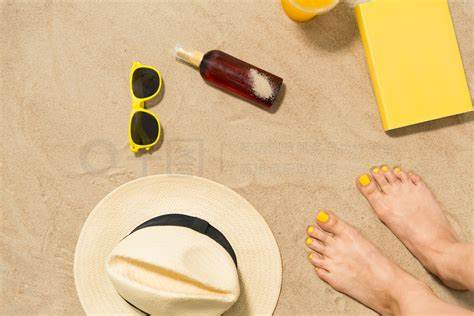

In [22]:
import requests
from PIL import Image
from io import BytesIO

# url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
url = "https://tse1-mm.cn.bing.net/th/id/OIP-C.7M4tlD8RsfH7u__eGF9qFQHaE8?rs=1&pid=ImgDetMain"
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for HTTP errors
im = Image.open(BytesIO(response.content))
im

In [23]:
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses", "book", "foot", "bottle"],
)
predictions

[{'score': 0.17009426653385162,
  'label': 'sunglasses',
  'box': {'xmin': 125, 'ymin': 61, 'xmax': 164, 'ymax': 157}},
 {'score': 0.11125241219997406,
  'label': 'bottle',
  'box': {'xmin': 178, 'ymin': 44, 'xmax': 285, 'ymax': 111}}]

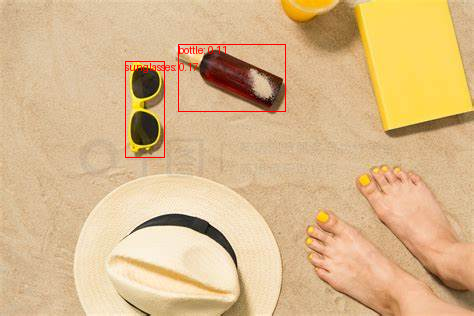

In [24]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im

## Pipeline背后的实现

In [25]:
from transformers import *
import torch

/home/pika/App/miniconda3/envs/transformers/lib/python3.10/site-packages/transformers/deepspeed.py:24: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


### Step1 初始化Tokenizer

In [26]:
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")

loading configuration file config.json from cache at /home/pika/.cache/huggingface/hub/models--uer--roberta-base-finetuned-dianping-chinese/snapshots/25faf1874b21e76db31ea9c396ccf2a0322e0071/config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_voc

### Step2 初始化Model

In [27]:
model = AutoModelForSequenceClassification.from_pretrained(
    "uer/roberta-base-finetuned-dianping-chinese"
)

loading configuration file config.json from cache at /home/pika/.cache/huggingface/hub/models--uer--roberta-base-finetuned-dianping-chinese/snapshots/25faf1874b21e76db31ea9c396ccf2a0322e0071/config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_voc

### Step3 数据预处理

In [28]:
input_text = "我觉得不太行！"
inputs = tokenizer(input_text, return_tensors="pt")
inputs

{'input_ids': tensor([[ 101, 2769, 6230, 2533,  679, 1922, 6121, 8013,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

### Step4 模型预测

In [29]:
res = model(**inputs)
res

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7376, -1.8681]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [30]:
logits = res.logits
logits

tensor([[ 1.7376, -1.8681]], grad_fn=<AddmmBackward0>)

### Step5 结果后处理

In [31]:
logits = torch.softmax(logits, dim=-1)
pred = torch.argmax(logits).item()
pred

0

In [32]:
model.config.id2label

{0: 'negative (stars 1, 2 and 3)', 1: 'positive (stars 4 and 5)'}

In [33]:
result = model.config.id2label.get(pred)
result

'negative (stars 1, 2 and 3)'